In [1]:
!pip install -q transformers==4.40.0 accelerate==0.32.1 bitsandbytes==0.43.0 gradio==4.40.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 793.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 107.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58

In [20]:
from transformers import BitsAndBytesConfig, AutoModelForVision2Seq, AutoProcessor
import torch
import gradio as gr
from transformers import BitsAndBytesConfig, AutoModelForVision2Seq, AutoProcessor
from transformers.image_utils import load_image
import torch
from PIL import Image

In [6]:
from transformers.image_utils import load_image
processor = AutoProcessor.from_pretrained("smishr-18/Idefics2-OCR", do_image_splitting=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


processor_config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.70k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AutoModelForVision2Seq.from_pretrained(
    "smishr-18/Idefics2-OCR",
    quantization_config=bnb_config,
    device_map=device,
    low_cpu_mem_usage=True
    )

model-00001-of-00007.safetensors:  88%|########8 | 4.10G/4.64G [00:00<?, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/4.25G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/93.4M [00:00<?, ?B/s]

In [22]:
def inference(image1, text):
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Explain"},
                {"type": "image"},
                {"type": "text", "text": text}
            ]
        }
    ]

    image1 = Image.fromarray(image1)

    # Apply chat template
    text = processor.apply_chat_template(messages, add_generation_prompt=True)

    # Prepare inputs
    inputs = processor(text=[text.strip()], images=[image1], return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generate texts
    generated_ids = model.generate(**inputs, max_new_tokens=500)
    generated_texts = processor.batch_decode(generated_ids, skip_special_tokens=True)
    return generated_texts[0].split("\n")[1]

In [11]:
test_image = load_image("https://oneingredientchef.com/wp-content/uploads/2014/04/NutritionFacts.jpg")

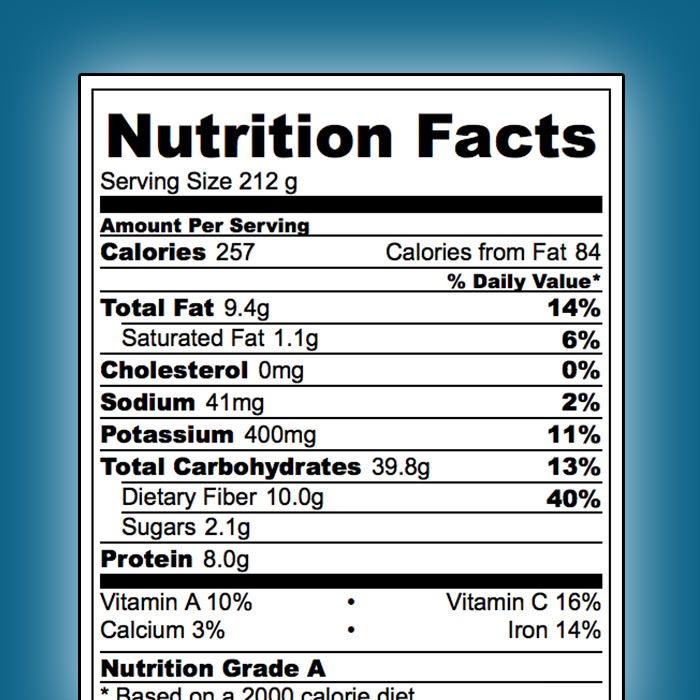

In [12]:
test_image

In [18]:
print(inference(test_image, "what is the Total and Saturated fat in the image?"))

Assistant: 9.4g and 1.1g


In [23]:
gr_interface = gr.Interface(
    fn=inference,
    inputs=["image", "text"],
    outputs="text",
    title="Vision Language Model Inference",
    description="Upload an image and enter a prompt to get model inference."
)

gr_interface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://43f2965be52ebee254.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://43f2965be52ebee254.gradio.live
